In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b> Energy efficiency Data Set.</b>

The dataset is taken from the study that simulated the heating and cooling loads of buildings as a function of building parameters.
12 different building shapes were simulated for the purpose of the analysis. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses.
	

Source: http://archive.ics.uci.edu/ml/datasets/Energy+efficiency


## Importing and tidying the dataset

In [13]:
data = pd.read_csv("ENB2012_data.csv", delimiter=";", 
                   usecols = [i for i in range(10)],
                   names = ["Relative Compactness","Surface Area","Wall Area","Roof Area","Overall Height", "Orientation",
                           "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"])

data = data[1:]
data = data.reset_index()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   index                      1296 non-null   int64 
 1   Relative Compactness       768 non-null    object
 2   Surface Area               768 non-null    object
 3   Wall Area                  768 non-null    object
 4   Roof Area                  768 non-null    object
 5   Overall Height             768 non-null    object
 6   Orientation                768 non-null    object
 7   Glazing Area               768 non-null    object
 8   Glazing Area Distribution  768 non-null    object
 9   Heating Load               768 non-null    object
 10  Cooling Load               768 non-null    object
dtypes: int64(1), object(10)
memory usage: 111.5+ KB


In [15]:
data.head()

,index,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,1,"0,98","514,50","294,00","110,25","7,00",2,"0,00",0,"15,55","21,33"
1,2,"0,98","514,50","294,00","110,25","7,00",3,"0,00",0,"15,55","21,33"
2,3,"0,98","514,50","294,00","110,25","7,00",4,"0,00",0,"15,55","21,33"
3,4,"0,98","514,50","294,00","110,25","7,00",5,"0,00",0,"15,55","21,33"
4,5,"0,90","563,50","318,50","122,50","7,00",2,"0,00",0,"20,84","28,28"


In [16]:
data = data.replace(",", ".", regex=True)

In [17]:
data.head()

,index,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,1,0.98,514.50,294.00,110.25,7.00,2,0.00,0,15.55,21.33
1,2,0.98,514.50,294.00,110.25,7.00,3,0.00,0,15.55,21.33
2,3,0.98,514.50,294.00,110.25,7.00,4,0.00,0,15.55,21.33
3,4,0.98,514.50,294.00,110.25,7.00,5,0.00,0,15.55,21.33
4,5,0.90,563.50,318.50,122.50,7.00,2,0.00,0,20.84,28.28


In [18]:
data=data.apply(pd.to_numeric)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      1296 non-null   int64  
 1   Relative Compactness       768 non-null    float64
 2   Surface Area               768 non-null    float64
 3   Wall Area                  768 non-null    float64
 4   Roof Area                  768 non-null    float64
 5   Overall Height             768 non-null    float64
 6   Orientation                768 non-null    float64
 7   Glazing Area               768 non-null    float64
 8   Glazing Area Distribution  768 non-null    float64
 9   Heating Load               768 non-null    float64
 10  Cooling Load               768 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 111.5 KB


In [20]:
data.isnull().sum()

index                          0
Relative Compactness         528
Surface Area                 528
Wall Area                    528
Roof Area                    528
Overall Height               528
Orientation                  528
Glazing Area                 528
Glazing Area Distribution    528
Heating Load                 528
Cooling Load                 528
dtype: int64

<AxesSubplot:>

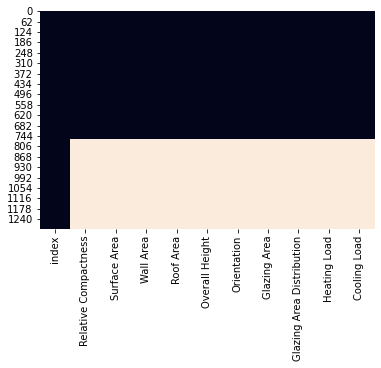

In [21]:
sns.heatmap(data.isnull(), cbar=False)

In [22]:
data = data.dropna()

<AxesSubplot:>

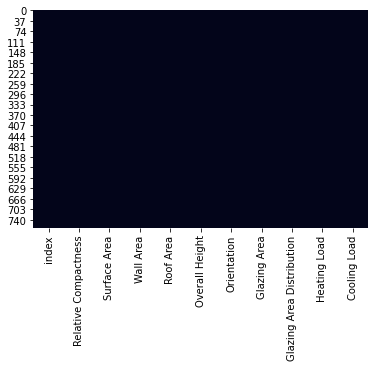

In [23]:
sns.heatmap(data.isnull(), cbar=False)

## Splitting the dataset

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
train, test = train_test_split(data, test_size=0.2, random_state=12)

In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 230 to 539
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       154 non-null    float64
 1   Surface Area               154 non-null    float64
 2   Wall Area                  154 non-null    float64
 3   Roof Area                  154 non-null    float64
 4   Overall Height             154 non-null    float64
 5   Orientation                154 non-null    float64
 6   Glazing Area               154 non-null    float64
 7   Glazing Area Distribution  154 non-null    float64
 8   Heating Load               154 non-null    float64
 9   Cooling Load               154 non-null    float64
dtypes: float64(10)
memory usage: 13.2 KB


## Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Target columns: 
- "Heating Load", 
- "Cooling Load"

In [96]:
target = "Heating Load"

In [91]:
corr_table=data.corr()
corr_table

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Relative Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272,0.634339
Surface Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120,-0.672999
Wall Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671,0.427117
Roof Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828,-0.862547
Overall Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889431,0.895785
Orientation,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587,0.014290
Glazing Area,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing Area Distribution,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-0.002587,2.698410e-01,8.736759e-02,1.000000,0.975862
Cooling Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,0.014290,2.075050e-01,5.052512e-02,0.975862,1.000000


<AxesSubplot:>

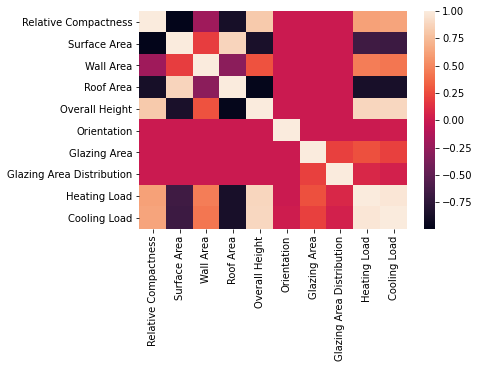

In [90]:
sns.heatmap(data.corr())

In [94]:
sorted_corrs = corr_table[target].abs().sort_values(ascending=False)
sorted_corrs

Heating Load                 1.000000
Cooling Load                 0.975862
Overall Height               0.889431
Roof Area                    0.861828
Surface Area                 0.658120
Relative Compactness         0.622272
Wall Area                    0.455671
Glazing Area                 0.269841
Glazing Area Distribution    0.087368
Orientation                  0.002587
Name: Heating Load, dtype: float64

In [110]:
strong_correlations = sorted_corrs[sorted_corrs > 0.3]
strong_correlations

Heating Load            1.000000
Cooling Load            0.975862
Overall Height          0.889431
Roof Area               0.861828
Surface Area            0.658120
Relative Compactness    0.622272
Wall Area               0.455671
Name: Heating Load, dtype: float64

The following features are strongly correlated with the target column.

In [116]:
features = strong_correlations.drop(["Heating Load", "Cooling Load"])
features

Overall Height          0.889431
Roof Area               0.861828
Surface Area            0.658120
Relative Compactness    0.622272
Wall Area               0.455671
Name: Heating Load, dtype: float64

In [117]:
features = features.index
features

Index(['Overall Height', 'Roof Area', 'Surface Area', 'Relative Compactness',
       'Wall Area'],
      dtype='object')

In [134]:
# The following function builds a linear regression model for calculating the target based on the feature columns, 
# as well as calculates the Root mean square error for the particular model.

def calc_rmse(features):
    lr = LinearRegression()
    lr.fit(train[features], train[target])

    train_predictions = lr.predict(train[features])
    train_mse = mean_squared_error(train[target], train_predictions)
    train_rmse = np.sqrt(train_mse)

    test_predictions = lr.predict(test[features])
    test_mse = mean_squared_error(test[target], test_predictions)
    test_rmse = np.sqrt(test_mse)

    print(train_rmse, test_rmse)
    return train_rmse, test_rmse

### Feature engineering 

In [121]:
from itertools import combinations

In [129]:
feature_combinations = []

Determining all possible feature combination

In [130]:
for i in range(1, len(features)+1):
    c = combinations([0,1,2,3,4],i)
    for j in list(c):
        feature_combinations.append(j)
        
feature_combinations

[(0,),
 (1,),
 (2,),
 (3,),
 (4,),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 4),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 4),
 (2, 3, 4),
 (0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 3, 4),
 (0, 2, 3, 4),
 (1, 2, 3, 4),
 (0, 1, 2, 3, 4)]

Building the linear regression models and their RMSError calculation.

In [164]:
train_rmses = []
test_rmses = []
sanakirja={}
for ehto in feature_combinations:
    columns = []
    for alkio in ehto:
        columns.append(features[alkio])
    
    sanakirja[ehto]=columns
    train_rmse, test_rmse = calc_rmse(columns)
    train_rmses.append(train_rmse)
    test_rmses.append(test_rmse)
    #print(columns)
    
    
#print(train_rmses)
#print(test_rmses)   

[4.55712699969348, 5.040175426040528, 7.601778059619571, 7.9055737557947, 8.973332960111076, 4.556447349412604, 4.020128395135652, 4.023403164394239, 3.9547632914841064, 4.522661192422458, 4.2800631420055755, 4.522661192422457, 7.19601290073955, 4.522661192422459, 5.039825889703935, 3.9441200527902436, 3.8788944690847282, 3.9441200527902436, 4.015022905166357, 3.9441200527902445, 3.9215470159820107, 4.056989768269926, 4.5193590316030265, 4.056989768269925, 4.056989768269918, 3.8669721709292575, 3.946448006073275, 3.866972170929261, 3.8669721709292597, 4.064841429231089, 3.867106313586498]
[4.811471144740372, 5.401508280181481, 7.558948186781943, 7.848775839799842, 8.991286709981122, 4.8060953669669155, 4.501967975680569, 4.53079541924859, 4.506615557326976, 5.090077112584537, 4.933730875350559, 5.090077112584537, 7.2037726848539005, 5.090077112584537, 5.476877243014828, 4.487040762242953, 4.495214412034966, 4.487040762242951, 4.511642047219671, 4.487040762242952, 4.481452543033247, 4.7

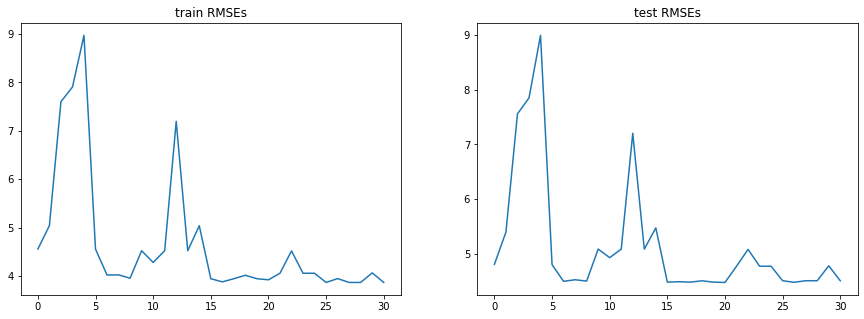

In [167]:
fig = plt.figure(figsize=(15,5))


ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("train RMSEs")
plt.plot(train_rmses)


ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("test RMSEs")
plt.plot(test_rmses)

plt.show()

What model does have the minimum RMSError in the test dataset?

In [146]:
min_test_rmse=min(test_rmses)
min_test_rmse_index = test_rmses.index(min_test_rmse)
print(min_test_rmse, min_test_rmse_index)

4.481452543033247 20


The one that takes the following columns as features

In [153]:
sanakirja[feature_combinations[min_test_rmse_index]]

['Overall Height', 'Relative Compactness', 'Wall Area']

Judging by the test RMSError, the following models have errors close to the minimal one.

In [168]:
for i in range(15,21):
    print(test_rmses[i].round(3))
    print(sanakirja[feature_combinations[i]])
    print("----------")

4.487
['Overall Height', 'Roof Area', 'Surface Area']
----------
4.495
['Overall Height', 'Roof Area', 'Relative Compactness']
----------
4.487
['Overall Height', 'Roof Area', 'Wall Area']
----------
4.512
['Overall Height', 'Surface Area', 'Relative Compactness']
----------
4.487
['Overall Height', 'Surface Area', 'Wall Area']
----------
4.481
['Overall Height', 'Relative Compactness', 'Wall Area']
----------


## Classification. Logistic Regression.

In [169]:
from sklearn.linear_model import LogisticRegression

In [173]:
target = "Orientation"

In [171]:
orientations = data["Orientation"].unique()
orientations

array([2., 3., 4., 5.])

It is already in categorical values expressed witn numbers:

2 - North
3 - West
4 - South
5 - East

One-vs-all approach: the problem is converted into n=4 binary classification problems.

1. North is positive (1); the rest (West, East, South) are negative (0).
2. West is positive (1); the rest (North, East, South) are negative (0).
3. East is positive (1); the rest (North, West, South) are negative (0).
4. South is positive (1); the rest (North, East, West) are negative (0).

In [174]:
sorted_corrs = corr_table[target].abs().sort_values(ascending=False)
sorted_corrs

Orientation                  1.000000
Cooling Load                 0.014290
Heating Load                 0.002587
Glazing Area Distribution    0.000000
Glazing Area                 0.000000
Overall Height               0.000000
Roof Area                    0.000000
Wall Area                    0.000000
Surface Area                 0.000000
Relative Compactness         0.000000
Name: Orientation, dtype: float64

In [178]:
features = data.columns.drop(['Orientation', 'Roof Area'])
features

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Overall Height',
       'Glazing Area', 'Glazing Area Distribution', 'Heating Load',
       'Cooling Load'],
      dtype='object')

In [269]:
features = ['Relative Compactness','Surface Area','Wall Area','Heating Load', 'Cooling Load']
features

['Relative Compactness',
 'Surface Area',
 'Wall Area',
 'Heating Load',
 'Cooling Load']

### Splitting the dataset 

In [203]:
#data = data.reset_index()
shuffled_rows = np.random.permutation(data.index)
shuffled_rows
shuffled_data = data.iloc[shuffled_rows]

In [226]:
train, test = train_test_split(shuffled_data, test_size=0.2, random_state=13)

In [227]:
test = test.reset_index()
test

,level_0,index,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,650,651,0.74,686.0,245.0,220.5,3.5,4,0.40,3,14.10,16.57
1,407,408,0.76,661.5,416.5,122.5,7.0,5,0.25,3,36.52,37.29
2,198,199,0.90,563.5,318.5,122.5,7.0,4,0.10,4,28.86,32.83
3,425,426,0.64,784.0,343.0,220.5,3.5,3,0.25,3,16.93,20.03
4,505,506,0.74,686.0,245.0,220.5,3.5,3,0.25,5,11.67,14.58
...,...,...,...,...,...,...,...,...,...,...,...,...
149,427,428,0.64,784.0,343.0,220.5,3.5,5,0.25,3,16.86,20.28
150,464,465,0.69,735.0,294.0,220.5,3.5,2,0.25,4,12.91,15.37
151,219,220,0.74,686.0,245.0,220.5,3.5,5,0.10,4,10.14,13.53
152,645,646,0.76,661.5,416.5,122.5,7.0,3,0.40,3,39.84,38.48


### Building the models 

In [242]:
models={}

for side in orientations:
    y = train["Orientation"]== side
    
    logReg = LogisticRegression()
    logReg.fit(train[features], y)
    
    models[side] = logReg

In [229]:
models

{2.0: LogisticRegression(),
 3.0: LogisticRegression(),
 4.0: LogisticRegression(),
 5.0: LogisticRegression()}

In [230]:
testing_probs = pd.DataFrame(columns=orientations)

for side in orientations:
    probability = models[side].predict_proba(test[features])
    testing_probs[side] = probability[:,1]

In [231]:
testing_probs

,2.0,3.0,4.0,5.0
0,0.272654,0.253983,0.288321,0.196182
1,0.237475,0.213870,0.272637,0.254002
2,0.264687,0.207446,0.282746,0.243019
3,0.243376,0.219637,0.259698,0.261848
4,0.276468,0.255107,0.288866,0.194174
...,...,...,...,...
149,0.242592,0.215406,0.257741,0.268677
150,0.264108,0.249479,0.279680,0.209349
151,0.278247,0.252682,0.287816,0.196586
152,0.237074,0.234095,0.282161,0.225119


In [232]:
predicted_orientation = testing_probs.idxmax(axis=1)
predicted_orientation

0      4.0
1      4.0
2      4.0
3      5.0
4      4.0
      ... 
149    5.0
150    4.0
151    4.0
152    4.0
153    4.0
Length: 154, dtype: float64

In [233]:
test["Predictions"] = predicted_orientation
test[["Orientation", "Predictions"]]

In [278]:
(test["Orientation"]==test["Predictions"]).sum()

31

### Building models as a function

In [258]:
def calc_predictions(features):
    test_copy = test.copy()
    models={}

    for side in orientations:
        y = train["Orientation"]== side

        logReg = LogisticRegression()
        logReg.fit(train[features], y)

        models[side] = logReg
        
        testing_probs = pd.DataFrame(columns=orientations)

    for side in orientations:
        probability = models[side].predict_proba(test_copy[features])
        testing_probs[side] = probability[:,1]
    
    predicted_orientation = testing_probs.idxmax(axis=1)
    test_copy["Predictions"] = predicted_orientation
    correct_predictions = (test_copy["Orientation"]==test_copy["Predictions"]).sum()
    
    return correct_predictions
    #print(correct_ones)

### Feature Engineering 

In [270]:
features

['Relative Compactness',
 'Surface Area',
 'Wall Area',
 'Heating Load',
 'Cooling Load']

In [271]:
feature_combinations = []

for i in range(1, len(features)+1):
    c = combinations([0,1,2,3,4],i)
    for j in list(c):
        feature_combinations.append(j)
        
#feature_combinations

In [272]:
list_correct_ones = []

sanakirja={}
for ehto in feature_combinations:
    columns = []
    for alkio in ehto:
        columns.append(features[alkio])
    
    sanakirja[ehto]=columns
    correct_predictions = calc_predictions(columns)
    list_correct_ones.append(correct_predictions)
    
#print(list_correct_ones)
#print(sanakirja)

[20, 20, 19, 20, 20, 20, 19, 20, 20, 20, 20, 22, 20, 19, 29, 20, 20, 22, 20, 19, 28, 22, 20, 31, 29, 20, 20, 31, 30, 27, 30]
{(0,): ['Relative Compactness'], (1,): ['Surface Area'], (2,): ['Wall Area'], (3,): ['Heating Load'], (4,): ['Cooling Load'], (0, 1): ['Relative Compactness', 'Surface Area'], (0, 2): ['Relative Compactness', 'Wall Area'], (0, 3): ['Relative Compactness', 'Heating Load'], (0, 4): ['Relative Compactness', 'Cooling Load'], (1, 2): ['Surface Area', 'Wall Area'], (1, 3): ['Surface Area', 'Heating Load'], (1, 4): ['Surface Area', 'Cooling Load'], (2, 3): ['Wall Area', 'Heating Load'], (2, 4): ['Wall Area', 'Cooling Load'], (3, 4): ['Heating Load', 'Cooling Load'], (0, 1, 2): ['Relative Compactness', 'Surface Area', 'Wall Area'], (0, 1, 3): ['Relative Compactness', 'Surface Area', 'Heating Load'], (0, 1, 4): ['Relative Compactness', 'Surface Area', 'Cooling Load'], (0, 2, 3): ['Relative Compactness', 'Wall Area', 'Heating Load'], (0, 2, 4): ['Relative Compactness', 'Wa

In [273]:
#list_correct_ones
max(list_correct_ones)

31

In [277]:
max_predictions=max(list_correct_ones)
max_predictions_index = list_correct_ones.index(max_predictions)
#print(max_predictions_index)
sanakirja[feature_combinations[max_predictions_index]]

23


['Surface Area', 'Heating Load', 'Cooling Load']

In [288]:
accuracy = max(list_correct_ones) / len(test)
accuracy

0.2012987012987013

### Cross-validation 

In [279]:
from sklearn.model_selection import cross_val_score, KFold

In [289]:
kf = KFold(n_splits= 4, shuffle=True, random_state=14)
logReg = LogisticRegression()

a = cross_val_score(logReg, test[['Surface Area', 'Heating Load', 'Cooling Load']],
                    test["Orientation"], scoring="accuracy", cv=kf)


C:\Users\Timo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Timo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [291]:
print(a)
print(np.mean(a).round(2))

[0.46153846 0.38461538 0.39473684 0.36842105]
0.4


## Decision Tree

In [346]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [312]:
data.columns

Index(['index', 'Relative Compactness', 'Surface Area', 'Wall Area',
       'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [360]:
data['Glazing Area'].value_counts()

0.40    240
0.10    240
0.25    240
0.00     48
Name: Glazing Area, dtype: int64

Let's divide the column into 2 categories: 'Glazing Area' < 0.25 and 'Glazing Area' >=0.25

In [361]:
dataGl = data.copy()

In [362]:
dataGl.loc[data['Glazing Area']<0.25, 'Glazing Area']=0
dataGl.loc[data['Glazing Area']>=0.25, 'Glazing Area']=1

In [363]:
dataGl['Glazing Area'].value_counts()

1.0    480
0.0    288
Name: Glazing Area, dtype: int64

In [364]:
shuffled_rows = np.random.permutation(dataGl.index)
shuffled_rows
shuffled_data = dataGl.iloc[shuffled_rows]

In [381]:
train, test = train_test_split(shuffled_data, test_size=0.2, random_state=10)

In [394]:
features = dataGl.columns
#features = ['Heating Load', 'Cooling Load']
features = ['Heating Load']
#features = ['Wall Area', 'Roof Area']
features

['Wall Area', 'Roof Area']

In [395]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(train[features], train['Glazing Area'])

predictions_train = clf.predict(train[features])
error_train = roc_auc_score(train['Glazing Area'], predictions_train)

predictions_test = clf.predict(test[features])
error_test = roc_auc_score(test['Glazing Area'], predictions_test)

print(error_train)
print(error_test)

0.5
0.5


With 1 column as a feature, the model tends to be overfitting. 
But already with 2 columns as features, the model fits almost perfectly (accuracy in the test dataset is over 90%.)

### Random forest 

In [386]:
from sklearn.ensemble import RandomForestClassifier

In [391]:
clf = RandomForestClassifier(n_estimators=3, bootstrap=True)
clf.fit(train[features], train['Glazing Area'])
predictions_test = clf.predict(test[features])
error_test = roc_auc_score(test['Glazing Area'], predictions_test)

In [390]:
print(error_test)

1.0


In the RandomForest model the accuracy is 100%.